# Collaborative Filtering


In [1]:
!kaggle datasets download valakhorasani/mobile-device-usage-and-user-behavior-dataset

Dataset URL: https://www.kaggle.com/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset
License(s): apache-2.0
  0% 0.00/11.3k [00:00<?, ?B/s]
100% 11.3k/11.3k [00:00<00:00, 15.3MB/s]


In [2]:
!unzip mobile-device-usage-and-user-behavior-dataset.zip


Archive:  mobile-device-usage-and-user-behavior-dataset.zip
  inflating: user_behavior_dataset.csv  


In [10]:
!pip install surprise -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 2.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [50]:
import pandas as pd
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import KNNBasic
from surprise import accuracy
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


In [49]:
data = pd.read_csv('/content/user_behavior_dataset.csv')
data.head(5)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [20]:
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=['number']).columns

# Apply Label Encoding to categorical features
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Store the encoder for later use if needed

# Apply Min-Max scaling to numerical features
scaler = MinMaxScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

print(data.head())


    User ID  Device Model  Operating System  App Usage Time (min/day)  \
0  0.000000             0                 0                  0.639085   
1  0.001431             1                 0                  0.419014   
2  0.002861             3                 0                  0.218310   
3  0.004292             0                 0                  0.367958   
4  0.005722             4                 1                  0.276408   

   Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                    0.490909                 0.583426   
1                    0.336364                 0.382386   
2                    0.272727                 0.170569   
3                    0.345455                 0.510591   
4                    0.300000                 0.395764   

   Number of Apps Installed  Data Usage (MB/day)       Age  Gender  \
0                  0.640449             0.425887  0.536585       1   
1                  0.359551             0.351566  0.707317       0   
2 

In [7]:
data.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')

In [51]:
features = ['App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 'Data Usage (MB/day)', 'Age']
X = df[features]

# 🔹 Normalize Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [52]:
k = 5  # Choose optimal k using elbow method
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [53]:
df

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class,Cluster
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4,3
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2,4
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3,2
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2,1
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4,3
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2,4
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1,4


In [54]:
silhouette_avg = silhouette_score(X_scaled, df['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.4008519441367795


In [55]:
def recommend_items(user_id, df):
    user_cluster = df.loc[df['User ID'] == user_id, 'Cluster'].values[0]
    similar_users = df[df['Cluster'] == user_cluster]['User ID'].tolist()
    return similar_users

user_id = 123  # Replace with actual user ID
print(f"Recommended Users for {user_id}: {recommend_items(user_id, df)}")

Recommended Users for 123: [8, 16, 20, 22, 28, 35, 38, 42, 46, 47, 49, 50, 55, 58, 61, 64, 69, 72, 81, 97, 98, 112, 122, 123, 124, 126, 131, 136, 139, 140, 145, 151, 166, 167, 170, 180, 183, 185, 186, 201, 209, 212, 216, 218, 219, 224, 226, 232, 233, 237, 240, 242, 253, 260, 263, 266, 268, 276, 286, 295, 304, 320, 330, 336, 337, 342, 343, 358, 361, 362, 365, 367, 368, 371, 372, 373, 374, 379, 382, 389, 395, 398, 401, 404, 405, 411, 412, 418, 430, 433, 435, 445, 447, 452, 461, 472, 482, 483, 490, 496, 503, 505, 510, 512, 519, 524, 531, 538, 539, 540, 541, 545, 560, 574, 575, 577, 581, 592, 596, 597, 607, 610, 611, 613, 633, 637, 640, 643, 655, 660, 665, 667, 673, 675, 690, 694, 695]


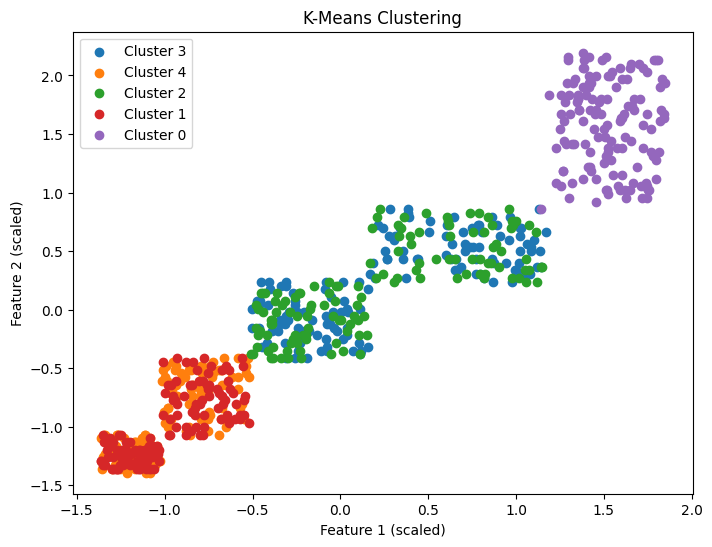

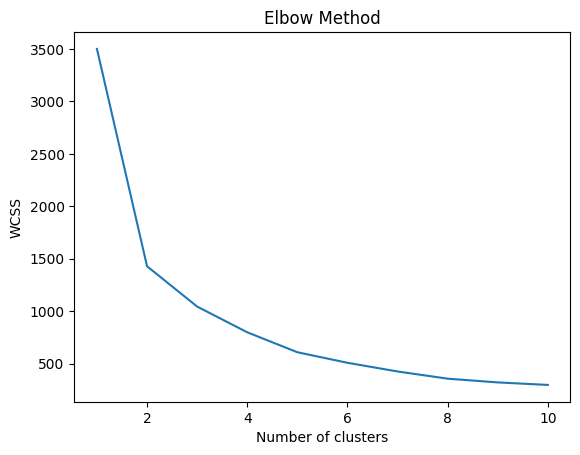

In [56]:
# prompt: plot the graph

import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with 'Cluster' and other relevant columns
# and 'X_scaled' is your scaled feature data
# If not defined, you would need to define or load them here

# Scatter plot of clusters
plt.figure(figsize=(8, 6))
for cluster in df['Cluster'].unique():
    plt.scatter(X_scaled[df['Cluster'] == cluster, 0],  # Replace 0 with appropriate feature index
                X_scaled[df['Cluster'] == cluster, 1],  # Replace 1 with appropriate feature index
                label=f'Cluster {cluster}')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1 (scaled)')  # Replace with your feature name
plt.ylabel('Feature 2 (scaled)')  # Replace with your feature name
plt.legend()
plt.show()


# Elbow Method plot (example - you may have already calculated this)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
